In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading DataSet

In [97]:
df = pd.read_csv("Unemployment in India.csv")
df.head(3)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural


### Data Preprocessing

In [98]:
df.columns = df.columns.str.strip()

In [99]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [100]:
df.dtypes

Region                                      object
Date                                        object
Frequency                                   object
Estimated Unemployment Rate (%)            float64
Estimated Employed                         float64
Estimated Labour Participation Rate (%)    float64
Area                                        object
dtype: object

In [101]:
df.isnull().sum()

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64

In [102]:
df = df.dropna()
df.tail(2)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban
753,West Bengal,30-06-2020,Monthly,9.86,9088931.0,37.57,Urban


In [103]:
df.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [104]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

### EDA

In [105]:
df.dtypes

Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                float64
Estimated Labour Participation Rate (%)           float64
Area                                               object
dtype: object

In [106]:
df.describe()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740,740.000000,7.400000e+02,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000
std,NaN,10.721298,8.087988e+06,8.111094


In [107]:
cv = (10.72/11.78)*100
cv

91.00169779286928

### Distribution of Unemployment rate

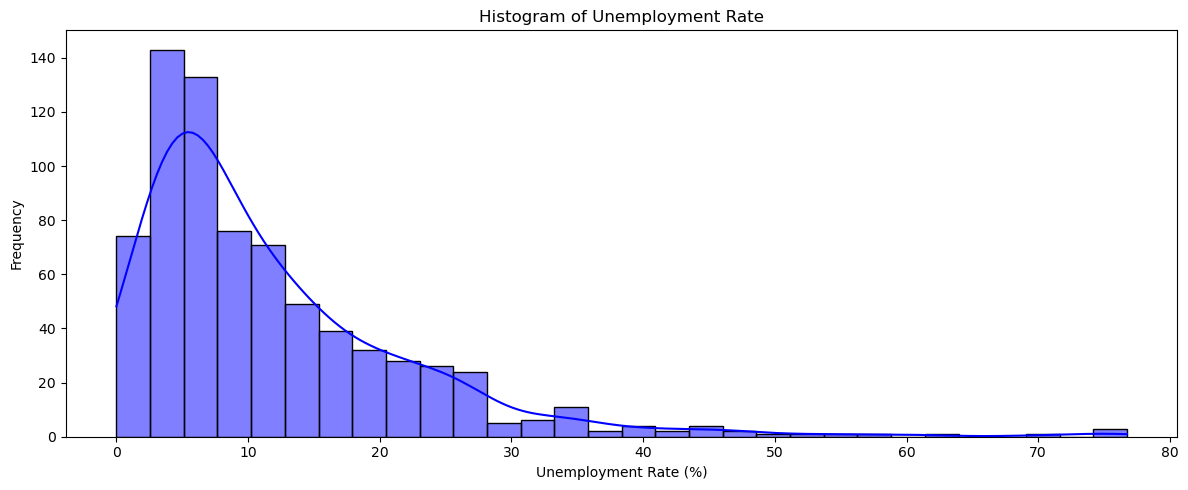

In [108]:
plt.figure(figsize=(12, 5))

sns.histplot(df['Estimated Unemployment Rate (%)'], bins=30, kde=True, color='blue')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Unemployment Rate')

plt.tight_layout()
plt.show()

### TIme-Series Analysis

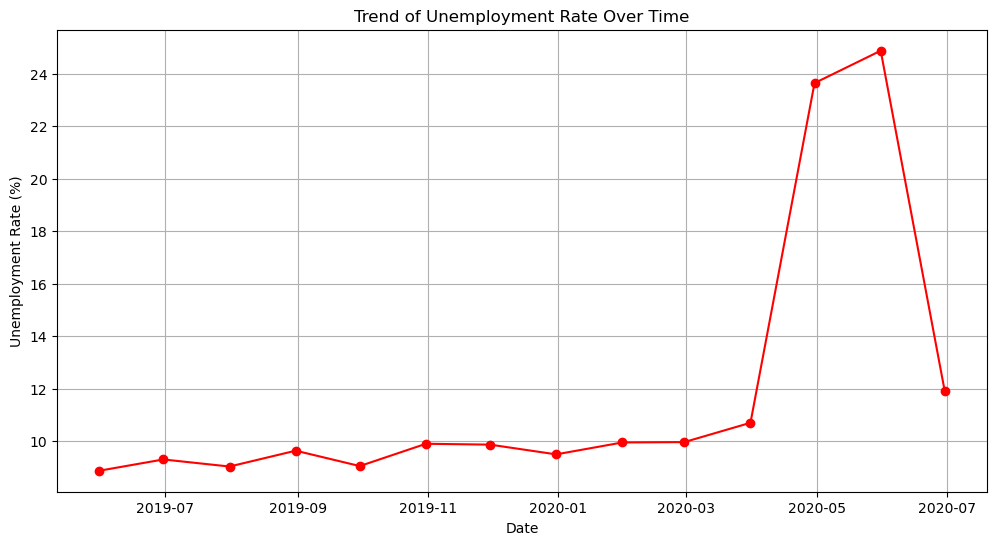

In [109]:
df_grouped = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(12,6))
plt.plot(df_grouped , marker = 'o' , linestyle='-' , color='red')
plt.title('Trend of Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()

### Unemployment Rate by Region

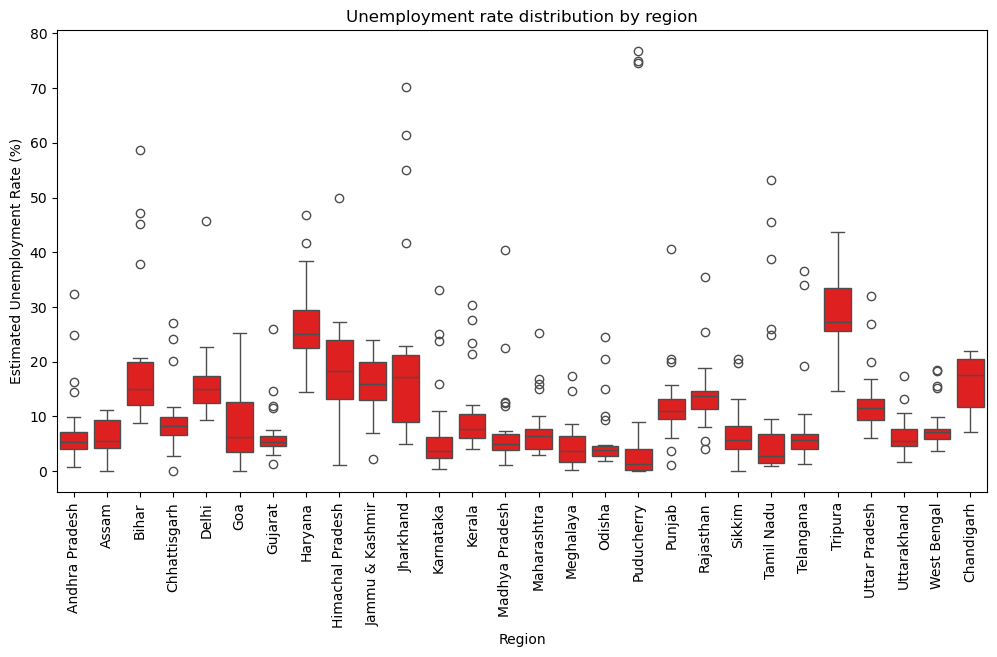

In [110]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Region'] , y = df['Estimated Unemployment Rate (%)'],color='red')

plt.title("Unemployment rate distribution by region")
plt.xticks(rotation=90)

plt.show()

### RelationShip between variables

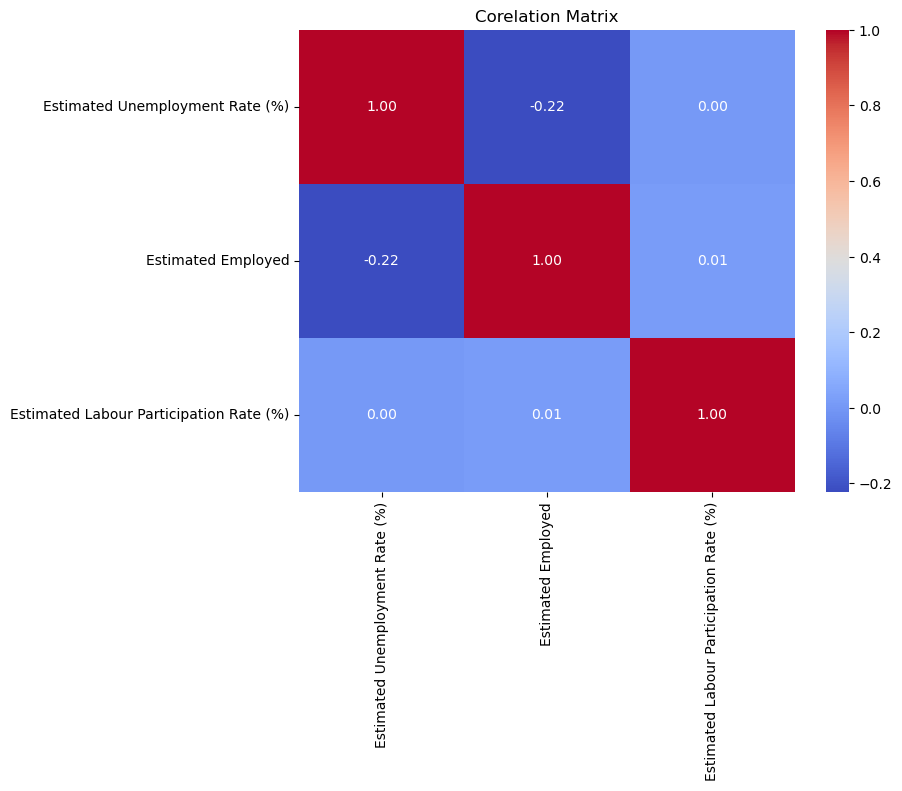

In [111]:
plt.figure(figsize=(8,6))

sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm" , fmt='.2f')
plt.title("Corelation Matrix")
plt.show()

### Trends Based on Area (Urban/Rural)

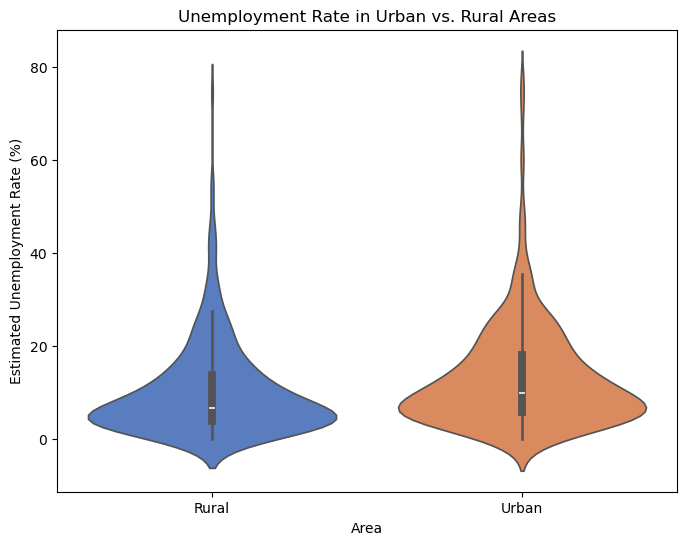

In [112]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Area', y='Estimated Unemployment Rate (%)', data=df, palette='muted',hue='Area',legend=False)
plt.title('Unemployment Rate in Urban vs. Rural Areas')
plt.show()